In [1]:
import cv2
import os
import matplotlib.pyplot as plt

In [2]:
from cnn.cnn import load_dataset, image_to_array
from dataset.dataset import load_files

Using TensorFlow backend.
/home/congyu/.virtualenvs/congyuml/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/congyu/.virtualenvs/congyuml/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/congyu/.virtualenvs/congyuml/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/congyu/.virtua

In [3]:
data_dir = "./data/mit_bih/"
save_dir = "./data/beats_img/"

In [4]:
train, valid, test = load_files(save_dir)

print(len(train))
print(len(valid))
print(len(test))

75331
16143
16146


In [5]:
example_img = os.path.join(save_dir, "NOR", train[0])

(64, 64, 1)


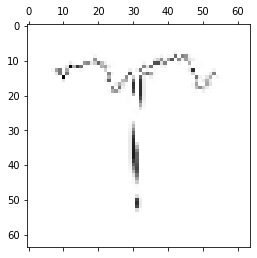

In [10]:
img = image_to_array(example_img, (64, 64), True, True)
print(img.shape)
plt.matshow(img.reshape(64,64), cmap="gray")

In [11]:
data_gen_train = load_dataset(train, 
                                save_dir, 
                                32, 
                                (64, 64),
                                random_crop=True,
                                random_rotate=True,
                                flip=True)

(32, 64, 64, 1)
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


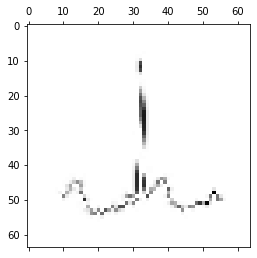

In [12]:
for data in data_gen_train:
    print(data[0].shape)
    print(data[0][0].reshape(64,64))
    plt.matshow(data[0][0].reshape(64,64), cmap="gray")
    break

In [18]:
x_batch, y_batch = next(data_gen_train)

In [20]:
print(x_batch.shape)
print(y_batch.shape)

(32, 64, 64, 1)
(32, 8)
